# WT-Übung 2 - Aufgabe 7b

Ein Schimpanse hat zwei Urnen vor sich: Urne 1 enthält drei weiße und zwei
schwarze, Urne 2 eine weiße, zwei grüne und zwei rote Kugeln. Über das
Verhalten des Schimpansen ist bekannt, dass er mit der Wahrscheinlichkeit 0,7
in die erste und mit der Wahrscheinlichkeit 0,3 in die zweite Urne greift.

Der Schimpanse darf nun solange Kugeln (ohne Zurucklegen) ziehen bis er eine
rote Kugel wählt. Wie groß ist die Wahrscheinlichkeit, dass er maximal drei
Kugeln zieht?

## Parameter

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import random, choice

# Kugeln (Werte erstmal unwichtig)
black, red, green, white = 0, 1, 2, 7

# Urnen
kugeln_urne1 = [white, white, white, black, black]
kugeln_urne2 = [white, green, green,   red,   red]

# Wkeiten
p_urne1 = 0.7
p_urne2 = 0.3  # 1 - p_urne1

def color(s, c): return '\033[1;3{}m{}\033[0m'.format(c, s)

## Simulation

Es werden $N$ zufällige Spiele durchgeführt und ausgewertet. Dabei werden die absoluten Häufigkeiten der (Indikator-)Ereignisse

$$
    Z_k = \{\text{Spiel endet nach genau $k$ Zügen}\},\quad k \leq 10
$$

bestimmt.

In [2]:
N = 100000       # Anzahl der Spiele
spiele = []      # Spielverläufe
h_N = [0] * 11   # absolute Häufigkeiten der Ereignisse Z_k

for _ in range(N):
    urne1, urne2 = list(kugeln_urne1), list(kugeln_urne2)  # copy
    spiel, kugel = [], None  
    
    while kugel != red:
        # Urne auswählen (Urne 1 kann leer sein)
        urne = urne1 if random() < p_urne1 and len(urne1) else urne2
        # zufällige Kugel aus der ausgewählten Urne nehmen und merken
        kugel = choice(urne)
        del urne[urne.index(kugel)]        
        spiel.append(color('●' + '₁₂'[urne == urne2], kugel))
        
    h_N[len(spiel)] += 1
    spiele.append(spiel)

### Spielverläufe

In [3]:
for n, spiel in zip(range(20), spiele):
    print("{:2}    {}".format(n + 1, ' '.join(spiel)))

 1    ●₁ ●₁ ●₂
 2    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂ ●₂ ●₂
 3    ●₂
 4    ●₁ ●₁ ●₁ ●₁ ●₂ ●₁ ●₂
 5    ●₁ ●₂ ●₂
 6    ●₂ ●₂
 7    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂
 8    ●₁ ●₂
 9    ●₁ ●₂ ●₁ ●₂ ●₁ ●₂
10    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂ ●₂ ●₂
11    ●₁ ●₂
12    ●₂ ●₂ ●₁ ●₁ ●₁ ●₂
13    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂
14    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂ ●₂ ●₂
15    ●₂
16    ●₁ ●₂
17    ●₁ ●₁ ●₁ ●₁ ●₁ ●₂
18    ●₂ ●₂
19    ●₁ ●₂ ●₂ ●₂
20    ●₁ ●₂


## Ergebnisse

Absolute Häufigkeiten der Anzahl gezogener Kugeln pro Spiel bei $N$ Durchläufen

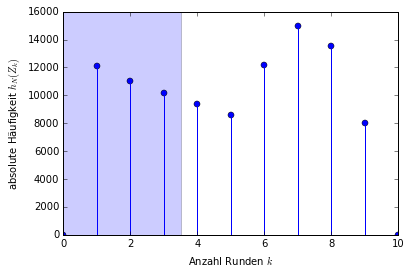

In [4]:
plt.stem(h_N)
plt.axvspan(0, 3.5, 0, 1, alpha=0.2)
plt.xlabel('Anzahl Runden $k$')
plt.ylabel('absolute Häufigkeit $h_N(Z_k)$');

In [5]:
print("P(Z₁ + Z₂ + Z₃) ≅ {:.4}".format(sum(h_N[:4]) / N))

P(Z₁ + Z₂ + Z₃) ≅ 0.3335
